# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [5]:
# a) Média e diferença com multiplicação matricial
X = df[['p1', 'p2']].values.T
T = np.array([[0.5, 0.5], [0.5, -0.5]])
Y = T @ X

df_transformed = pd.DataFrame(Y.T, columns=['média', 'diferença'])

# b) Correlação entre p1 e p2
correlation_p1_p2 = df['p1'].corr(df['p2'])

# c) Correlação entre média e diferença
correlation_mean_diff = df_transformed['média'].corr(df_transformed['diferença'])

# Resultados
print(f"Correlação entre p1 e p2: {correlation_p1_p2:.4f}")
print(f"Correlação entre média e diferença: {correlation_mean_diff:.4f}")

Correlação entre p1 e p2: 0.8957
Correlação entre média e diferença: -0.1335


<span style="color:red;">A correlaçao entre média e diferença é negativa! Mostrando que não houve evolução no processo.</span>

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [25]:
T_sum_diff = np.array([[1, 1], [1, -1]])  # Matriz de transformação
Y_sum_diff = T_sum_diff @ X  # Multiplicação matricial
df_sum_diff = pd.DataFrame(Y_sum_diff.T, columns=['soma', 'diferença'])
df_sum_diff

,soma,diferença
0,14.908120,-0.978736
1,7.960930,-2.238143
2,3.242944,1.294085
3,9.987507,1.038788
4,16.133092,-1.743712
5,7.664066,0.798063
6,19.644967,-0.029683
7,14.765911,-1.069316
8,10.509344,-0.890706
9,9.597237,-1.754886


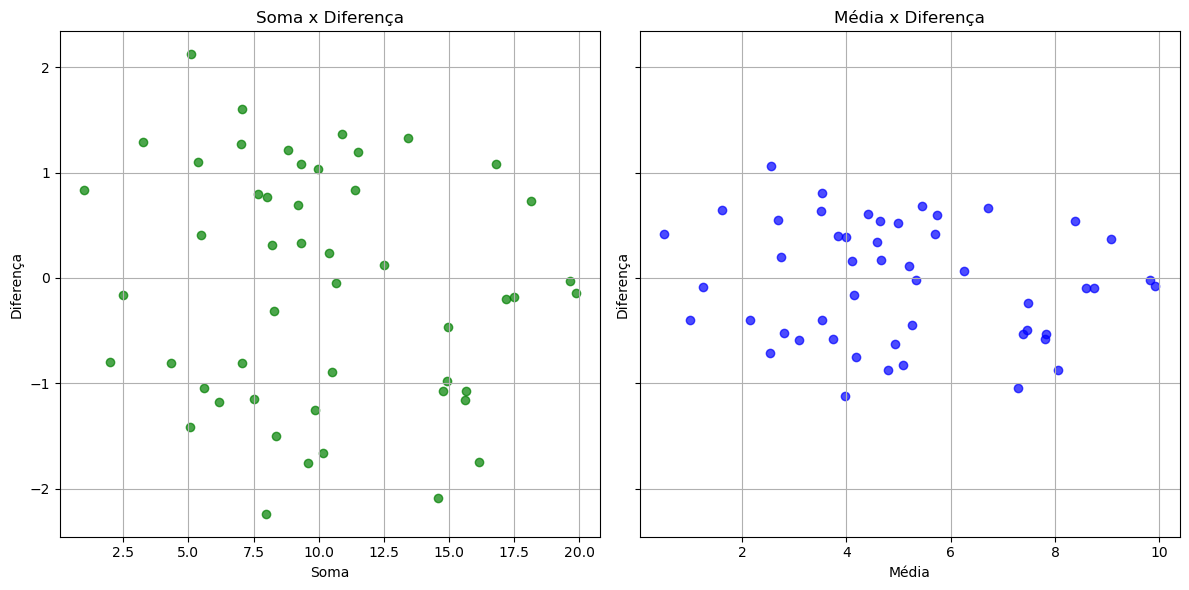

In [29]:
import matplotlib.pyplot as plt

# Plotando os dados transformados para soma e diferença

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Gráfico para soma e diferença
axes[0].scatter(df_sum_diff['soma'], df_sum_diff['diferença'], color='green', alpha=0.7)
axes[0].set_title('Soma x Diferença')
axes[0].set_xlabel('Soma')
axes[0].set_ylabel('Diferença')
axes[0].grid()

# Gráfico para média e diferença (para comparação visual)
axes[1].scatter(df_transformed['média'], df_transformed['diferença'], color='blue', alpha=0.7)
axes[1].set_title('Média x Diferença')
axes[1].set_xlabel('Média')
axes[1].set_ylabel('Diferença')
axes[1].grid()

plt.tight_layout()
plt.show()

<span style="color:red;">A soma x diferença estão mais espaçadas os pontos entre -2,5 a 2,5 e na média x diferença estão entre -1,1 a 1,1.</span>